# Clustering jerarquico y dendogramas

Antes de empezar, pongamos un poco de notacion para hablar todos el mismo idioma

* X datasets(array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con la informacion de las uniones
* k numero de clusters

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


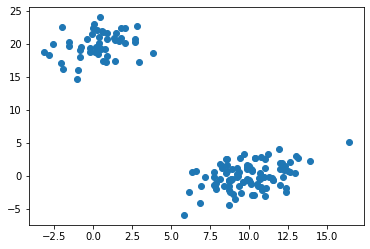

In [10]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
x = np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [12]:
z = linkage(x,'ward')


In [14]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [15]:
c, coph_dist = cophenet(z, pdist(x))
c

0.9800148387574268

In [16]:
z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [17]:
z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [18]:
z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [30]:
print(z[152-len(x)]) # Cluster 152

print(z[158-len(x)]) # Cluster 156

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [22]:
x[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

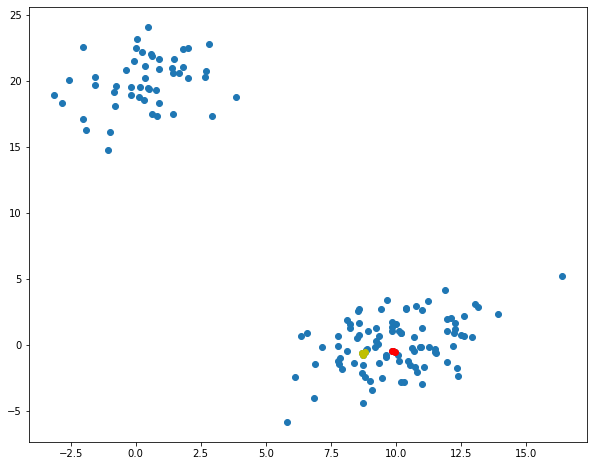

In [28]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1]) # Pintar todos los puntos
plt.scatter(x[idx,0], x[idx,1], c ="r") # Destacamos en rojo el primer cluster
plt.scatter(x[idx2,0], x[idx2,1], c ="y") # Destacamos en amarillo el segundo cluster
plt.show()

## Representacion grafica de un dendrograma

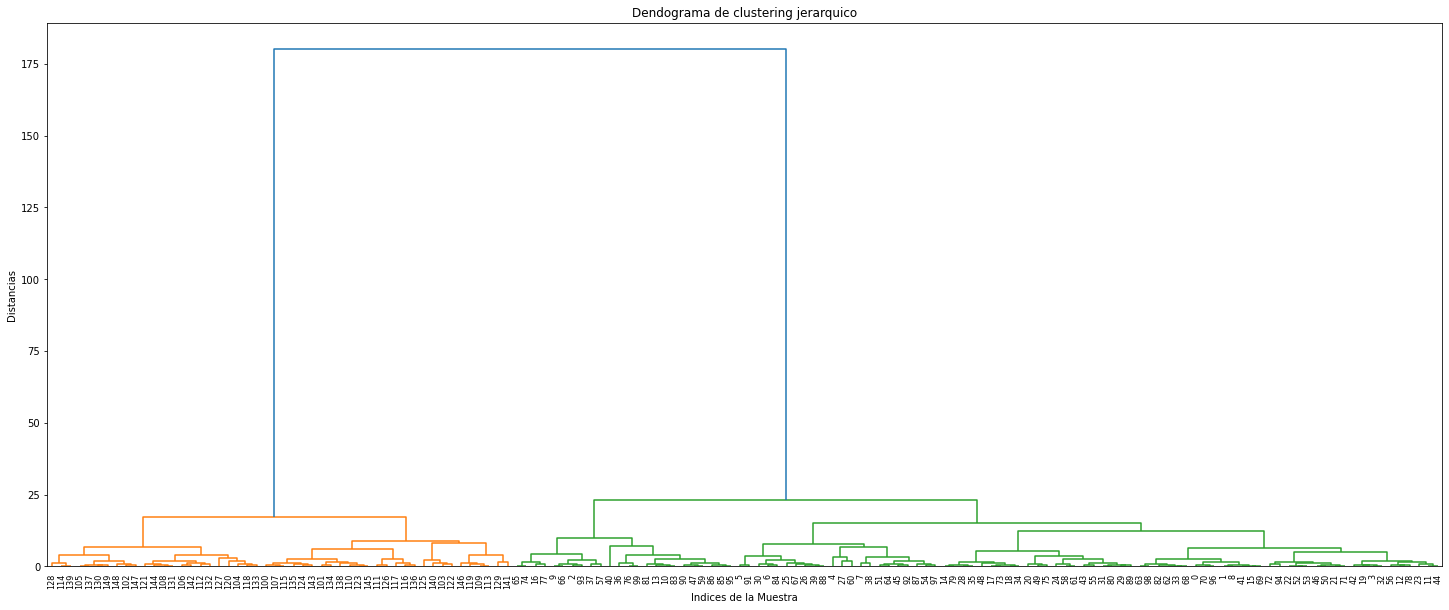

In [31]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0s)
plt.show()

In [33]:
z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

## Truncar el dendrograma

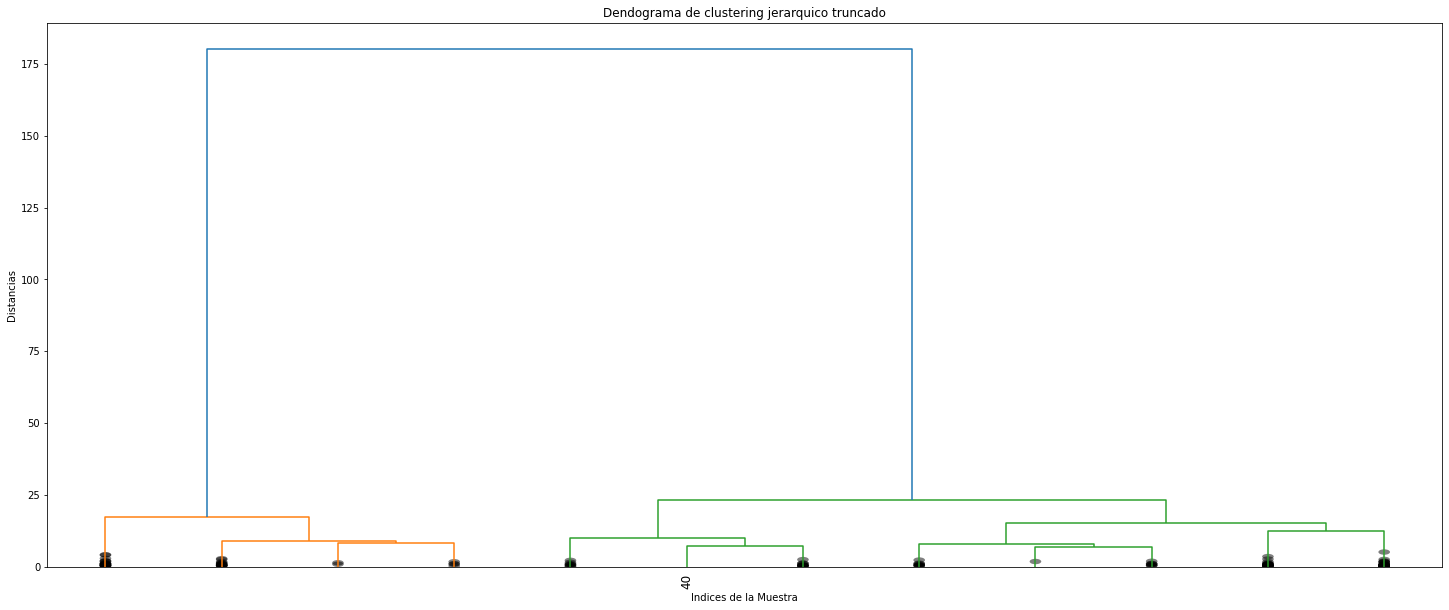

In [38]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico truncado")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12, show_leaf_counts=False, show_contracted=True)
plt.show()

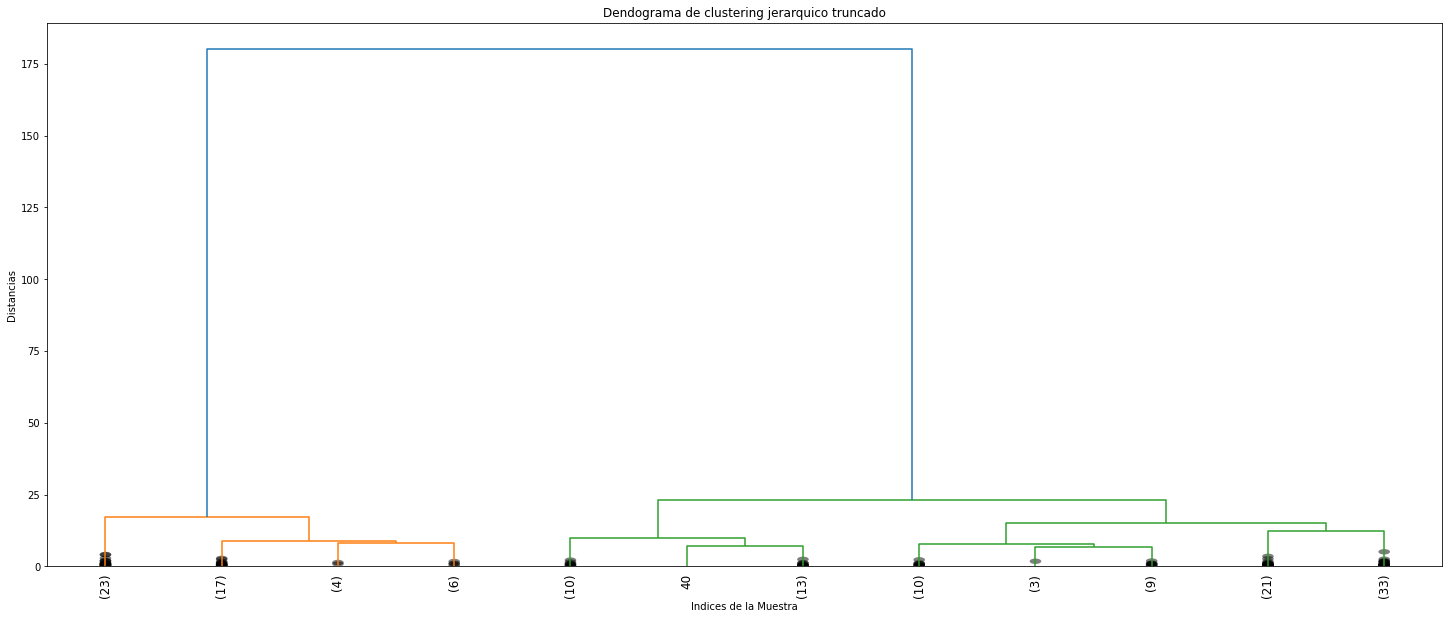

In [39]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico truncado")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12, show_leaf_counts=True
           , show_contracted=True)
plt.show()

## Dendrograma tuneado

In [57]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerarquico con Dendrograma truncado")
        plt.xlabel("Indice del Dataset (o tamano del cluster)")
        plt.ylabel("Distancia")
        for i,d,c in zip(ddata["icoord"], ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y,(x,y),xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c="k")
    
    return ddata

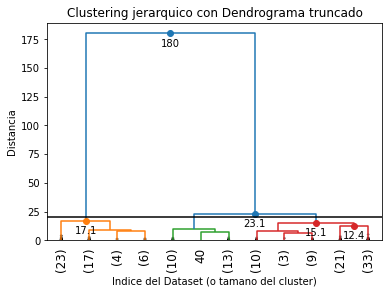

In [59]:
dendrogram_tune(z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=20)

plt.show()

## Corte automatico de dendrograma

inconsistency_i = (h_i-avg(h_i))/std(h_j)

In [60]:
from scipy.cluster.hierarchy import inconsistent

In [62]:
depth = 5
incons = inconsistent(z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

In [63]:
depth = 3
incons = inconsistent(z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

## Metodo del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


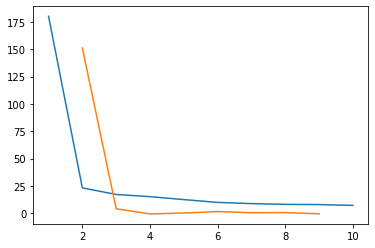

El numero optimo de cluster es 2


In [72]:
last = z[-10:, 2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El numero optimo de cluster es %s"%str(k))

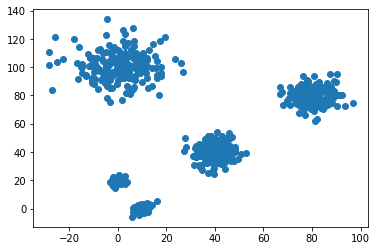

In [74]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200])
x2 = np.concatenate((x,c,d,e),)
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [75]:
z2 = linkage(x2,"ward")

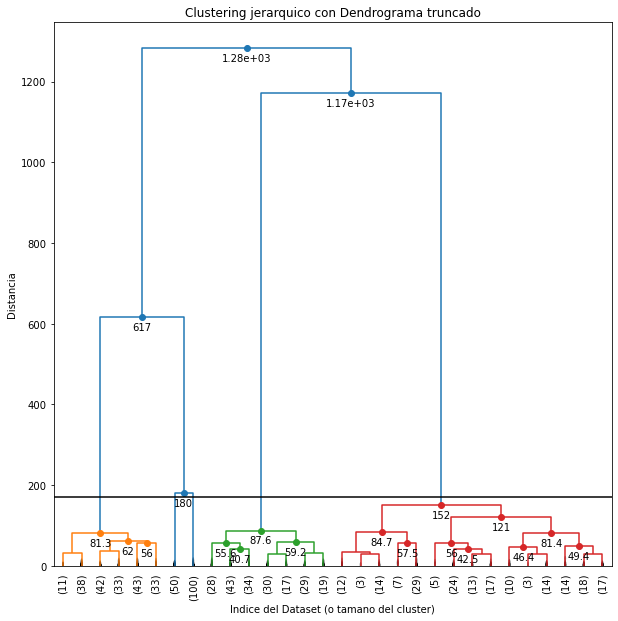

In [79]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40, 
    max_d=170
    
)
plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


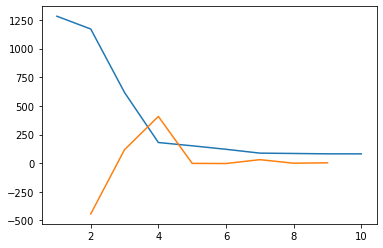

El numero optimo de cluster es 4


In [81]:
last = z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El numero optimo de cluster es %s"%str(k))

In [82]:
print(inconsistent(z2, 5)[-10:])

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]


## Recuperar los clusters y sus elementos


In [86]:
from scipy.cluster.hierarchy import fcluster

In [87]:
max_d = 20
clusters = fcluster(z, max_d, criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [88]:
k = 3
clusters = fcluster(z, k, criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [89]:
fcluster(z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

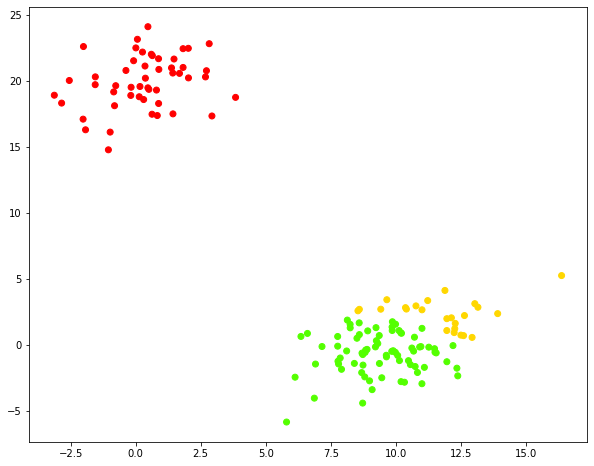

In [90]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1], c = clusters, cmap = "prism")
plt.show()

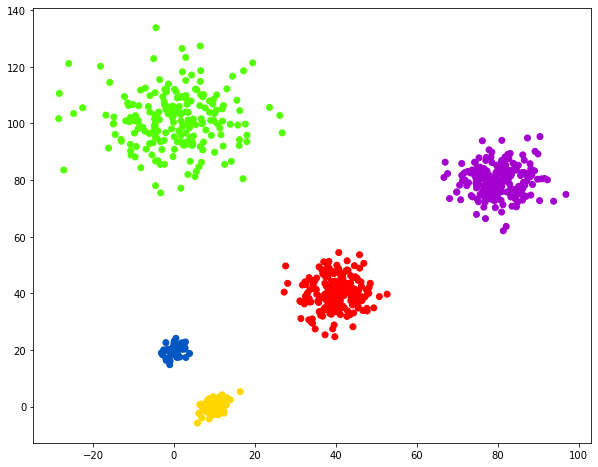

In [93]:
max_d = 170
clusters = fcluster(z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(x2[:,0], x2[:,1], c = clusters, cmap = "prism")
plt.show()